In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
# import ATARI
from ATARI import PiTFAll as pf
import h5py
h5py.enable_ipython_completer()


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [5]:

# initialize experimental setup
E_min_max = [100, 120]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': False,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.3,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
len(exp.energy_domain)

74

In [7]:
# run a performance test with the PiTFAll module

# case_file = './perf_test_baron'
# case_file = './perf_test_baron.hdf5'
case_file = './test.hdf5'
number_of_datasets = 10

# case_file = './perf_test_baron_rev2.hdf5'
# number_of_datasets = 27

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

vary_Erange = {'fullrange':(3,1000), 'maxres':5 , 'prob':0.01}

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False,
                    'Use HDF5'             :   True,
                    'Vary Erange'          :   vary_Erange} 



perf_test = pf.performance_test(number_of_datasets,
                                case_file,
                                input_options=input_options)

sample_data_df, out = perf_test.generate_syndats(Ta_pair, exp, 
                                                    solver='syndat_SLBW')
print(out)

User chose to NOT overwrite previously generated datasets in the file ./test.hdf5.
    Samples 10-10 already existed.
    If Syndat generation settings were changed these files should be overwriten.


In [7]:
# test accessing generated data
# sample_0 = pd.read_hdf(case_file, 'sample_0/syndat_par')
# sample_data_df = pd.read_hdf(case_file, 'test_stats/sample_data')


print(f"Average # Resonances: {np.mean(sample_data_df.NumRes)}")
print(f"Min/Max # Resonances: {np.min(sample_data_df.NumRes)}/{np.max(sample_data_df.NumRes)}")
print(f"Energy Points (constant): {np.mean(sample_data_df.NumEpts)}")
print(f"Min theoretical SE: {np.min(sample_data_df.theo_exp_SE)}")
# sample_0

Average # Resonances: 3.3
Min/Max # Resonances: 2/5
Energy Points (constant): 47.3
Min theoretical SE: 0.0010399651781660155


In [8]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally.
The data file ./test.hdf5 has been prepared based on the selected overwrite options.
Please run samples 0-10


In [9]:
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # del f['sample_0']['fit_pw']
# print(f['sample_9'].keys())
# # type(f['sample_9'])
# # print(f['test_stats/sample_data'].keys())
# f.close()


In [10]:
integral_FoMs, sample_data, printout = perf_test.analyze(Ta_pair)
# pd.read_hdf(case_file, 'integral_FoMs')

print(printout)

KeyError: "Unable to open object (object 'fit_pw' doesn't exist)"

In [ ]:
integral_FoMs

,fit_theo_MSE,fit_exp_SE,fit_exp_chi2,fit_exp_chi2dof,theo_exp_SE,theo_exp_chi2,theo_exp_chi2dof
0,3853.268717,0.076314,1259.601343,17.254813,0.052749,69.637873,0.953943
1,100.064014,0.083576,118.030696,1.616859,0.065242,81.833544,1.121007
2,549.886722,0.493006,9064.338758,124.169024,0.051709,69.442108,0.951262
3,36817.325150,0.199803,458.066686,6.274886,0.092407,125.467156,1.718728
4,5940.125815,0.056138,133.817194,1.833112,0.039298,61.106791,0.837079
...,...,...,...,...,...,...,...
95,62473.560153,0.052568,96.480125,1.321646,0.084159,131.519133,1.801632
96,7817.432793,0.620060,13476.525749,184.609942,0.173017,214.228799,2.934641
97,3354.909408,0.062914,119.839441,1.641636,0.069142,108.069628,1.480406
98,5501.618393,0.109106,303.057790,4.151477,0.026557,37.254114,0.510330


In [ ]:
# figure()
# scatter(integral_FoMs.fit_theo_MSE, sample_data.NumRes, marker='.', s=35)
# ylim([-0.1,np.max(sample_data_df.NumRes)+1])
# xlim([0-np.max(integral_FoMs.fit_theo_MSE)/3,np.max(integral_FoMs.fit_theo_MSE)*1.1])

# figure()
# bins = hist(integral_FoMs.fit_theo_MSE, bins=20)

# pw_data, syndat_par_df, fit_par_df = pf.read_sample_case_data(case_file, 96)
# print(fit_par_df)
# figure()
# plot(pw_data.E, pw_data.est_trans)

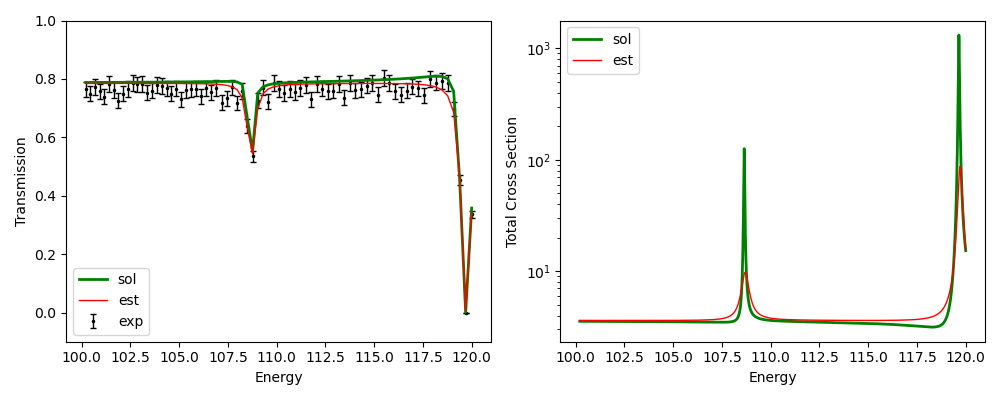

In [ ]:
fig = pf.sample_case.plot(case_file, 95, Ta_pair, True, True)

7817.432793034401
            E         Gg       gnx2    J  chs  lwave  J_ID
0  102.553959  44.206294  26.598604  3.0  1.0    0.0   1.0
1  110.724011  45.077260  38.817355  3.0  1.0    0.0   1.0
2  115.471409  47.171960  16.562935  3.0  1.0    0.0   1.0
            E         Gg       gnx2    J  chs  lwave  J_ID
0  110.712067  20.531060  49.990609  3.0  1.0    0.0   1.0
1  113.458968   0.000015   0.000000  3.0  1.0    0.0   1.0
2  115.479876   0.000000   6.364187  3.0  1.0    0.0   1.0


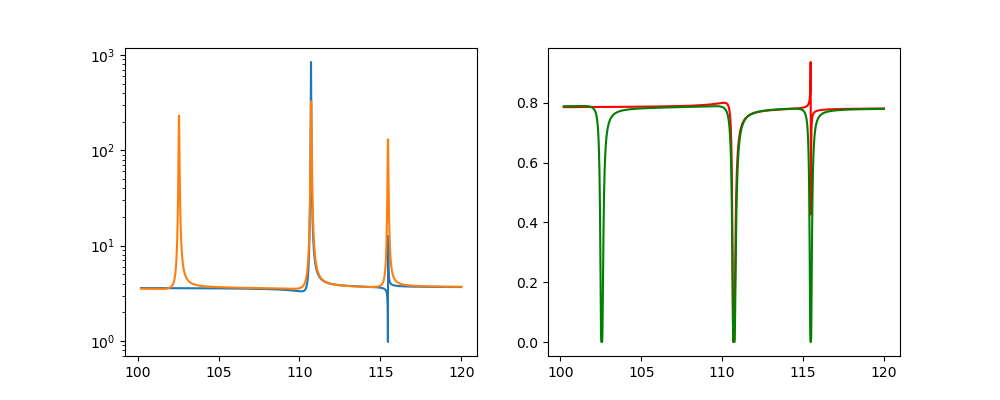

In [ ]:
pw_data, syndat_par_df, fit_par_df = pf.sample_case.read_sample_case_data(case_file,96)

xs_tot_syndat, xs_tot_fit, new_egrid = pf.sample_case.calculate_xs(pw_data.E, Ta_pair, syndat_par_df, fit_par_df, True)

n = exp.redpar.val.n  # atoms per barn or atoms/(1e-12*cm^2)
trans_fit = np.exp(-n*xs_tot_fit)
trans_syndat = np.exp(-n*xs_tot_syndat)

from scipy import integrate
est_sol_SE = integrate.trapezoid((xs_tot_syndat-xs_tot_fit)**2, new_egrid)
print(est_sol_SE)

print(syndat_par_df)
print(fit_par_df)

fig, ax = subplots(1,2, figsize=(10,4))
ax[0].plot(new_egrid, xs_tot_fit)
ax[0].plot(new_egrid, xs_tot_syndat)
ax[0].set_yscale('log')

ax[1].plot(new_egrid, trans_fit, 'r')
ax[1].plot(new_egrid, trans_syndat, 'g')